In [1]:
from PIL import Image, ImageOps
import albumentations as A
import numpy as np
import os

In [2]:
def image_blur(img):
    transform = A.Blur(blur_limit=7)
    augmented_image = transform(image=img)['image']
    return augmented_image

def image_noise(img):
    transform = A.GaussNoise(var_limit=(70.0, 100.0), p=1)
    augmented_image = transform(image=img)['image']
    return augmented_image

def gaussian_blur(img):
    transform = A.GaussianBlur(blur_limit=7)
    augmented_image = transform(image=img)['image']
    return augmented_image

def affine(img):
    transform = A.Affine(scale=1, translate_percent=0, shear=15)
    augmented_image = transform(image=img)['image']
    return augmented_image

def elastic(img):
    transform = A.ElasticTransform()
    augmented_image = transform(image=img)['image']
    return augmented_image

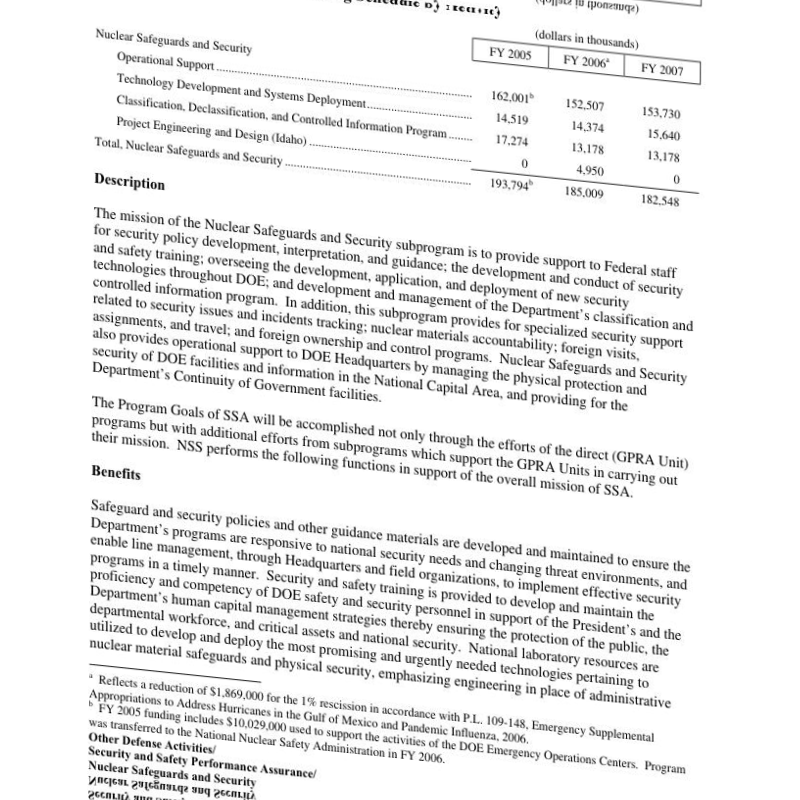

In [3]:
img_path = "/home/chirag_tubakad/DocDiff/test-images/single-augmentations/8987.png"
img = Image.open(img_path)
img_np = np.array(img)
img_np = elastic(img_np)
img_PIL = Image.fromarray(img_np)
img_PIL

In [5]:
new_path = "/home/chirag_tubakad/DocDiff/test-images/single-augmentations/8987_elastic.png"
img_PIL.save(new_path)


# pil_image = Image.open(test_file)
# pil_image

## 480x480 test images transformations application

In [2]:
size = (480,480)
def affine(img_list):
    for img_path in img_list:
        img = Image.open(img_path)
        img_np = np.array(img)
        transform = A.Affine(scale=0.9, rotate = (-45, 45), shear=10, fit_output=True, cval =[255,255,255], p=1)
        augmented_image = transform(image=img_np)['image']
        img_PIL = Image.fromarray(augmented_image)
        if "original" in img_path:
            new_path = img_path.replace("original","augmented")
        ImageOps.pad(img_PIL, size, color="#fff").save(new_path)
    # return img_PIL

In [3]:
pdf_images_path = os.listdir("/home/chirag_tubakad/DocDiff/test-images-rot/original")
pdf_images = [os.path.join("/home/chirag_tubakad/DocDiff/test-images-rot/original", f) for f in pdf_images_path]
affine(pdf_images)

In [4]:
img = affine("/home/chirag_tubakad/DocDiff/test-images-rot/augmented/pdfs2001.png")
img

IsADirectoryError: [Errno 21] Is a directory: '/'

In [4]:
img.size

(480, 480)